## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [2]:
## 
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [3]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min())) / (x.max() - x.min()) -0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y      

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total para

In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 251s 5ms/step - loss: 1.6933 - acc: 0.3973 - val_loss: 1.5139 - val_acc: 0.4684
Epoch 2/100
50000/50000 [==============================] - 238s 5ms/step - loss: 1.4675 - acc: 0.4801 - val_loss: 1.4728 - val_acc: 0.4769
Epoch 3/100
50000/50000 [==============================] - 236s 5ms/step - loss: 1.3519 - acc: 0.5204 - val_loss: 1.4223 - val_acc: 0.5006
Epoch 4/100
50000/50000 [==============================] - 236s 5ms/step - loss: 1.2538 - acc: 0.5570 - val_loss: 1.4086 - val_acc: 0.5105
Epoch 5/100
50000/50000 [==============================] - 235s 5ms/step - loss: 1.1776 - acc: 0.5839 - val_loss: 1.3524 - val_acc: 0.5291
Epoch 6/100
50000/50000 [==============================] - 234s 5ms/step - loss: 1.0931 - acc: 0.6100 - val_loss: 1.3710 - val_acc: 0.5311
Epoch 7/100
50000/50000 [==============================] - 234s 5ms/

50000/50000 [==============================] - 233s 5ms/step - loss: 0.1053 - acc: 0.9659 - val_loss: 3.5250 - val_acc: 0.5327
Epoch 58/100
50000/50000 [==============================] - 233s 5ms/step - loss: 0.1010 - acc: 0.9677 - val_loss: 3.5545 - val_acc: 0.5378
Epoch 59/100
50000/50000 [==============================] - 233s 5ms/step - loss: 0.0929 - acc: 0.9682 - val_loss: 3.6757 - val_acc: 0.5312
Epoch 60/100
50000/50000 [==============================] - 241s 5ms/step - loss: 0.1105 - acc: 0.9643 - val_loss: 3.5586 - val_acc: 0.5182
Epoch 61/100
50000/50000 [==============================] - 234s 5ms/step - loss: 0.0922 - acc: 0.9690 - val_loss: 3.7939 - val_acc: 0.5316
Epoch 62/100
50000/50000 [==============================] - 235s 5ms/step - loss: 0.0987 - acc: 0.9675 - val_loss: 3.6755 - val_acc: 0.5273
Epoch 63/100
50000/50000 [==============================] - 234s 5ms/step - loss: 0.1108 - acc: 0.9633 - val_loss: 3.6427 - val_acc: 0.5226
Epoch 64/100
50000/50000 [=======

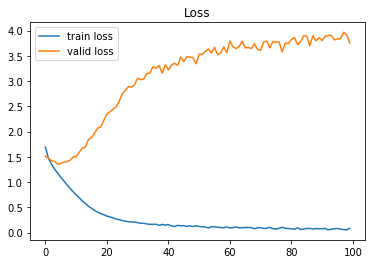

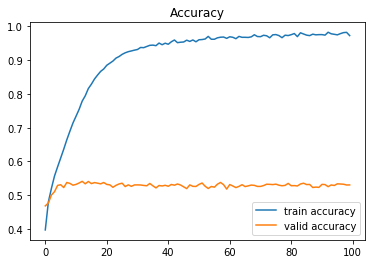

In [13]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()